In [2]:
import requests as req

In [3]:
URL = 'https://jsonplaceholder.typicode.com/albums/100/photos'

In [4]:
album = '1'

In [5]:
PARAMS = {'albumId': album}

In [6]:
photos = req.get(url = URL, params = PARAMS)

In [8]:
data = photos.json()

In [10]:
import pandas as pd

In [22]:
image = pd.DataFrame(data)

In [23]:
image.head(4)

,albumId,id,thumbnailUrl,title,url
0,1,1,https://via.placeholder.com/150/92c952,accusamus beatae ad facilis cum similique qui ...,https://via.placeholder.com/600/92c952
1,1,2,https://via.placeholder.com/150/771796,reprehenderit est deserunt velit ipsam,https://via.placeholder.com/600/771796
2,1,3,https://via.placeholder.com/150/24f355,officia porro iure quia iusto qui ipsa ut modi,https://via.placeholder.com/600/24f355
3,1,4,https://via.placeholder.com/150/d32776,culpa odio esse rerum omnis laboriosam volupta...,https://via.placeholder.com/600/d32776


In [25]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
albumId         50 non-null int64
id              50 non-null int64
thumbnailUrl    50 non-null object
title           50 non-null object
url             50 non-null object
dtypes: int64(2), object(3)
memory usage: 2.0+ KB


In [35]:
image['initial'] = image.title.str[0]

In [36]:
image.head()

,albumId,id,thumbnailUrl,title,url,initial
0,1,1,https://via.placeholder.com/150/92c952,accusamus beatae ad facilis cum similique qui ...,https://via.placeholder.com/600/92c952,a
1,1,2,https://via.placeholder.com/150/771796,reprehenderit est deserunt velit ipsam,https://via.placeholder.com/600/771796,r
2,1,3,https://via.placeholder.com/150/24f355,officia porro iure quia iusto qui ipsa ut modi,https://via.placeholder.com/600/24f355,o
3,1,4,https://via.placeholder.com/150/d32776,culpa odio esse rerum omnis laboriosam volupta...,https://via.placeholder.com/600/d32776,c
4,1,5,https://via.placeholder.com/150/f66b97,natus nisi omnis corporis facere molestiae rer...,https://via.placeholder.com/600/f66b97,n


In [53]:
count = image.groupby('initial').count()[['id']]
count

,id
initial,
a,8
b,2
c,2
e,7
f,1
h,2
i,2
l,1
m,2


In [51]:
import matplotlib.pyplot

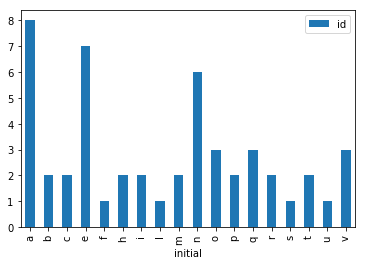

In [52]:
count.plot.bar()

# OPEN-WEATHERMAP API

In [1]:
import requests as req
import pandas as pd
import json
import re

In [2]:
# reading wiki Table of cities in india by population
wiki_tab = pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population')

In [3]:
print (wiki_tab)

[        0                    1                    2                 3  \
0    Rank                 City  Population(2011)[3]  Population(2001)   
1       1               Mumbai             12442373          11978450   
2       2                Delhi             11007835           9879172   
3       3            Bangalore              8436675           6537124   
4       4            Hyderabad              6809970           3637483   
5       5            Ahmedabad              5570585           3520085   
6       6              Chennai              4681087           4343645   
7       7              Kolkata              4486679           4301326   
8       8                Surat              4467797           2433835   
9       9                 Pune              3124458           2538473   
10     10               Jaipur              3046163           2322575   
11     11              Lucknow              2817105           2185927   
12     12               Kanpur              276534

In [4]:
#selecting cities by population in to Dataframe(table)
df = pd.DataFrame(wiki_tab[0])

In [5]:
df.head()

,0,1,2,3,4
0,Rank,City,Population(2011)[3],Population(2001),State or union territory
1,1,Mumbai,12442373,11978450,Maharashtra
2,2,Delhi,11007835,9879172,Delhi
3,3,Bangalore,8436675,6537124,Karnataka
4,4,Hyderabad,6809970,3637483,Telangana


In [6]:
df.columns = ['rank', 'city', 'population_11', 'population_01', 'state']

In [7]:
df = df.drop([0])

In [8]:
#slicing top 50 cities
Top_city = df['city'][0:50].astype(str)
Top_city.head(50)

1                  Mumbai
2                   Delhi
3               Bangalore
4               Hyderabad
5               Ahmedabad
6                 Chennai
7                 Kolkata
8                   Surat
9                    Pune
10                 Jaipur
11                Lucknow
12                 Kanpur
13                 Nagpur
14                 Indore
15                  Thane
16                 Bhopal
17    Visakhapatnam[a][5]
18       Pimpri-Chinchwad
19                  Patna
20               Vadodara
21              Ghaziabad
22               Ludhiana
23                   Agra
24                 Nashik
25              Faridabad
26                 Meerut
27                 Rajkot
28        Kalyan-Dombivli
29            Vasai-Virar
30               Varanasi
31               Srinagar
32             Aurangabad
33                Dhanbad
34               Amritsar
35            Navi Mumbai
36              Allahabad
37                 Howrah
38                 Ranchi
39          

In [9]:
# To clean the city names to match openweather api
def clean_text(txt):
 city = re.sub("(\-[A-Za-z0-9])|([^A-Za-z]+)", "", txt)
 return (city)

In [10]:
Top_cities = []
for x in Top_city:
    Top_cities.append(clean_text(x))

In [11]:
Top_cities[17] #check for -

'Pimprihinchwad'

In [12]:
key = 'e853da8a71f32a9a4f71fafca2a8ca7a' #spare key

key2 = '1a3795c3407c047c44350035ff7f7c94'
base = 'http://api.openweathermap.org/data/2.5/forecast?'

In [13]:
URL = base + "appid=" + key + "&q="
url = base + "appid=" + key2 + "&q="

In [14]:
#data extraction from openweathermap api and looping for top 50 cities

forecast_dict = {}

def city_forecast(city):
    weather_data = req.get(url + city)
    weather_data = weather_data.json()
    if weather_data['cod'] == '200': #removes any empty data
      return weather_data

In [15]:
for city in Top_cities:
    forecast_dict[city] = city_forecast(city)
    

In [16]:
#Removing 'None' valued keys from the dict

forecast_dict1 = {k:v for k,v in forecast_dict.items() if v is not None}

In [17]:
pd.DataFrame(forecast_dict1) # visualizing in table to check any None values

,Mumbai,Delhi,Bangalore,Hyderabad,Ahmedabad,Chennai,Kolkata,Surat,Pune,Jaipur,...,Jabalpur,Coimbatore,Vijayawada,Jodhpur,Madurai,Raipur,Kota,Chandigarh,Guwahati,Solapur
city,"{'id': 1275339, 'name': 'Mumbai', 'coord': {'l...","{'id': 1273294, 'name': 'Delhi', 'coord': {'la...","{'id': 1277333, 'name': 'Bangalore', 'coord': ...","{'id': 1269843, 'name': 'Hyderabad', 'coord': ...","{'id': 1279233, 'name': 'Ahmedabad', 'coord': ...","{'id': 1264527, 'name': 'Chennai', 'coord': {'...","{'id': 1275004, 'name': 'Kolkata', 'coord': {'...","{'id': 1255364, 'name': 'Surat', 'coord': {'la...","{'id': 1259229, 'name': 'Pune', 'coord': {'lat...","{'id': 1269515, 'name': 'Jaipur', 'coord': {'l...",...,"{'id': 1269633, 'name': 'Jabalpur', 'coord': {...","{'id': 1273865, 'name': 'Coimbatore', 'coord':...","{'id': 1253184, 'name': 'Vijayawada', 'coord':...","{'id': 1268865, 'name': 'Jodhpur', 'coord': {'...","{'id': 1264521, 'name': 'Madurai', 'coord': {'...","{'id': 1258980, 'name': 'Raipur', 'coord': {'l...","{'id': 1266049, 'name': 'Kota', 'coord': {'lat...","{'id': 1274746, 'name': 'Chandigarh', 'coord':...","{'id': 1271476, 'name': 'Guwahati', 'coord': {...","{'id': 1256436, 'name': 'Solapur', 'coord': {'..."
cnt,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
cod,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
list,"[{'dt': 1565319600, 'main': {'temp': 301.33, '...","[{'dt': 1565319600, 'main': {'temp': 304.58, '...","[{'dt': 1565319600, 'main': {'temp': 297.47, '...","[{'dt': 1565319600, 'main': {'temp': 299.13, '...","[{'dt': 1565319600, 'main': {'temp': 299.05, '...","[{'dt': 1565319600, 'main': {'temp': 303.12, '...","[{'dt': 1565319600, 'main': {'temp': 304.5, 't...","[{'dt': 1565319600, 'main': {'temp': 299.25, '...","[{'dt': 1565319600, 'main': {'temp': 294.66, '...","[{'dt': 1565319600, 'main': {'temp': 300.84, '...",...,"[{'dt': 1565319600, 'main': {'temp': 298.02, '...","[{'dt': 1565319600, 'main': {'temp': 294.43, '...","[{'dt': 1565319600, 'main': {'temp': 302.75, '...","[{'dt': 1565319600, 'main': {'temp': 303.94, '...","[{'dt': 1565319600, 'main': {'temp': 301.68, '...","[{'dt': 1565319600, 'main': {'temp': 298.62, '...","[{'dt': 1565319600, 'main': {'temp': 301.31, '...","[{'dt': 1565319600, 'main': {'temp': 301.07, '...","[{'dt': 1565319600, 'main': {'temp': 306.93, '...","[{'dt': 1565319600, 'main': {'temp': 298.91, '..."
message,0.0073,0.007,0.0084,0.0074,0.0069,0.0097,0.0136,0.0074,0.0076,0.0058,...,0.0063,0.0079,0.0084,0.0061,0.0062,0.0074,0.0077,0.0085,0.0067,0.0074


In [18]:
from pandas.io.json import json_normalize  
from pprint import pprint

In [19]:
pprint(forecast_dict)

{'Agra': {'city': {'coord': {'lat': 27.1753, 'lon': 78.0098},
                   'country': 'IN',
                   'id': 1279259,
                   'name': 'Agra',
                   'population': 1430055,
                   'timezone': 19800},
          'cnt': 40,
          'cod': '200',
          'list': [{'clouds': {'all': 70},
                    'dt': 1565319600,
                    'dt_txt': '2019-08-09 03:00:00',
                    'main': {'grnd_level': 977.4,
                             'humidity': 65,
                             'pressure': 996.61,
                             'sea_level': 996.61,
                             'temp': 304.59,
                             'temp_kf': 1.33,
                             'temp_max': 304.59,
                             'temp_min': 303.266},
                    'sys': {'pod': 'd'},
                    'weather': [{'description': 'broken clouds',
                                 'icon': '04d',
                                 '

                   {'clouds': {'all': 100},
                    'dt': 1565676000,
                    'dt_txt': '2019-08-13 06:00:00',
                    'main': {'grnd_level': 982.07,
                             'humidity': 82,
                             'pressure': 1001.08,
                             'sea_level': 1001.08,
                             'temp': 300.966,
                             'temp_kf': 0,
                             'temp_max': 300.966,
                             'temp_min': 300.966},
                    'rain': {'3h': 5.312},
                    'sys': {'pod': 'd'},
                    'weather': [{'description': 'moderate rain',
                                 'icon': '10d',
                                 'id': 501,
                                 'main': 'Rain'}],
                    'wind': {'deg': 282.707, 'speed': 1.15}},
                   {'clouds': {'all': 100},
                    'dt': 1565686800,
                    'dt_txt': '2019-08-13 

                         'dt': 1565492400,
                         'dt_txt': '2019-08-11 03:00:00',
                         'main': {'grnd_level': 995.69,
                                  'humidity': 85,
                                  'pressure': 1000.71,
                                  'sea_level': 1000.71,
                                  'temp': 299.399,
                                  'temp_kf': 0,
                                  'temp_max': 299.399,
                                  'temp_min': 299.399},
                         'rain': {'3h': 0.688},
                         'sys': {'pod': 'd'},
                         'weather': [{'description': 'light rain',
                                      'icon': '10d',
                                      'id': 500,
                                      'main': 'Rain'}],
                         'wind': {'deg': 217.252, 'speed': 4.83}},
                        {'clouds': {'all': 91},
                         'dt': 1565503

 'Allahabad': {'city': {'coord': {'lat': 25.4381, 'lon': 81.8338},
                        'country': 'IN',
                        'id': 1278994,
                        'name': 'Allahabad',
                        'population': 1073438,
                        'timezone': 19800},
               'cnt': 40,
               'cod': '200',
               'list': [{'clouds': {'all': 32},
                         'dt': 1565319600,
                         'dt_txt': '2019-08-09 03:00:00',
                         'main': {'grnd_level': 986.08,
                                  'humidity': 67,
                                  'pressure': 997.85,
                                  'sea_level': 997.85,
                                  'temp': 305.4,
                                  'temp_kf': 2.31,
                                  'temp_max': 305.4,
                                  'temp_min': 303.086},
                         'sys': {'pod': 'd'},
                         'weather': [{'desc

                         'wind': {'deg': 261.822, 'speed': 4.93}},
                        {'clouds': {'all': 100},
                         'dt': 1565578800,
                         'dt_txt': '2019-08-12 03:00:00',
                         'main': {'grnd_level': 989.25,
                                  'humidity': 65,
                                  'pressure': 1001.09,
                                  'sea_level': 1001.09,
                                  'temp': 304.712,
                                  'temp_kf': 0,
                                  'temp_max': 304.712,
                                  'temp_min': 304.712},
                         'rain': {'3h': 0.875},
                         'sys': {'pod': 'd'},
                         'weather': [{'description': 'light rain',
                                      'icon': '10d',
                                      'id': 500,
                                      'main': 'Rain'}],
                         'wind': {'de

                                 'humidity': 82,
                                 'pressure': 998.13,
                                 'sea_level': 998.13,
                                 'temp': 300.424,
                                 'temp_kf': 0,
                                 'temp_max': 300.424,
                                 'temp_min': 300.424},
                        'rain': {'3h': 0.188},
                        'sys': {'pod': 'n'},
                        'weather': [{'description': 'light rain',
                                     'icon': '10n',
                                     'id': 500,
                                     'main': 'Rain'}],
                        'wind': {'deg': 81.577, 'speed': 2.71}},
                       {'clouds': {'all': 63},
                        'dt': 1565406000,
                        'dt_txt': '2019-08-10 03:00:00',
                        'main': {'grnd_level': 975.18,
                                 'humidity': 73,
          

                                     'icon': '04n',
                                     'id': 804,
                                     'main': 'Clouds'}],
                        'wind': {'deg': 137.547, 'speed': 0.92}},
                       {'clouds': {'all': 100},
                        'dt': 1565665200,
                        'dt_txt': '2019-08-13 03:00:00',
                        'main': {'grnd_level': 973.21,
                                 'humidity': 50,
                                 'pressure': 998.38,
                                 'sea_level': 998.38,
                                 'temp': 307.6,
                                 'temp_kf': 0,
                                 'temp_max': 307.6,
                                 'temp_min': 307.6},
                        'sys': {'pod': 'd'},
                        'weather': [{'description': 'overcast clouds',
                                     'icon': '04d',
                                     'id': 804,
   

                          'dt_txt': '2019-08-11 00:00:00',
                          'main': {'grnd_level': 942.13,
                                   'humidity': 88,
                                   'pressure': 1003.44,
                                   'sea_level': 1003.44,
                                   'temp': 295.8,
                                   'temp_kf': 0,
                                   'temp_max': 295.8,
                                   'temp_min': 295.8},
                          'rain': {'3h': 0.188},
                          'sys': {'pod': 'n'},
                          'weather': [{'description': 'light rain',
                                       'icon': '10n',
                                       'id': 500,
                                       'main': 'Rain'}],
                          'wind': {'deg': 226.175, 'speed': 3.97}},
                         {'clouds': {'all': 8},
                          'dt': 1565492400,
                          '

                                   'humidity': 86,
                                   'pressure': 1005.07,
                                   'sea_level': 1005.07,
                                   'temp': 296.137,
                                   'temp_kf': 0,
                                   'temp_max': 296.137,
                                   'temp_min': 296.137},
                          'sys': {'pod': 'n'},
                          'weather': [{'description': 'overcast clouds',
                                       'icon': '04n',
                                       'id': 804,
                                       'main': 'Clouds'}],
                          'wind': {'deg': 277.168, 'speed': 5.35}}],
                'message': 0.0064},
 'Bangalore': {'city': {'coord': {'lat': 12.9762, 'lon': 77.6033},
                        'country': 'IN',
                        'id': 1277333,
                        'name': 'Bangalore',
                        'population': 5104

                         'wind': {'deg': 263.078, 'speed': 5.96}},
                        {'clouds': {'all': 88},
                         'dt': 1565568000,
                         'dt_txt': '2019-08-12 00:00:00',
                         'main': {'grnd_level': 912.25,
                                  'humidity': 85,
                                  'pressure': 1008.74,
                                  'sea_level': 1008.74,
                                  'temp': 292.8,
                                  'temp_kf': 0,
                                  'temp_max': 292.8,
                                  'temp_min': 292.8},
                         'sys': {'pod': 'n'},
                         'weather': [{'description': 'overcast clouds',
                                      'icon': '04n',
                                      'id': 804,
                                      'main': 'Clouds'}],
                         'wind': {'deg': 263.761, 'speed': 6.18}},
                  

                               'humidity': 94,
                               'pressure': 996.68,
                               'sea_level': 996.68,
                               'temp': 296.251,
                               'temp_kf': 0,
                               'temp_max': 296.251,
                               'temp_min': 296.251},
                      'rain': {'3h': 0.188},
                      'sys': {'pod': 'n'},
                      'weather': [{'description': 'light rain',
                                   'icon': '10n',
                                   'id': 500,
                                   'main': 'Rain'}],
                      'wind': {'deg': 198.684, 'speed': 5.02}},
                     {'clouds': {'all': 96},
                      'dt': 1565395200,
                      'dt_txt': '2019-08-10 00:00:00',
                      'main': {'grnd_level': 945.09,
                               'humidity': 93,
                               'pressure': 997.

                               'temp': 297.3,
                               'temp_kf': 0,
                               'temp_max': 297.3,
                               'temp_min': 297.3},
                      'sys': {'pod': 'n'},
                      'weather': [{'description': 'overcast clouds',
                                   'icon': '04n',
                                   'id': 804,
                                   'main': 'Clouds'}],
                      'wind': {'deg': 265.679, 'speed': 5.28}},
                     {'clouds': {'all': 98},
                      'dt': 1565654400,
                      'dt_txt': '2019-08-13 00:00:00',
                      'main': {'grnd_level': 950.58,
                               'humidity': 91,
                               'pressure': 1003.12,
                               'sea_level': 1003.12,
                               'temp': 296.743,
                               'temp_kf': 0,
                               'temp_max': 

                                   'temp_max': 309.558,
                                   'temp_min': 309.558},
                          'sys': {'pod': 'd'},
                          'weather': [{'description': 'scattered clouds',
                                       'icon': '03d',
                                       'id': 802,
                                       'main': 'Clouds'}],
                          'wind': {'deg': 312.89, 'speed': 2.92}},
                         {'clouds': {'all': 75},
                          'dt': 1565611200,
                          'dt_txt': '2019-08-12 12:00:00',
                          'main': {'grnd_level': 963.04,
                                   'humidity': 66,
                                   'pressure': 998.83,
                                   'sea_level': 998.83,
                                   'temp': 305.792,
                                   'temp_kf': 0,
                                   'temp_max': 305.792,
        

                                    'main': 'Clouds'}],
                       'wind': {'deg': 262.998, 'speed': 5.14}},
                      {'clouds': {'all': 98},
                       'dt': 1565427600,
                       'dt_txt': '2019-08-10 09:00:00',
                       'main': {'grnd_level': 998.86,
                                'humidity': 43,
                                'pressure': 1003.61,
                                'sea_level': 1003.61,
                                'temp': 307.768,
                                'temp_kf': 0,
                                'temp_max': 307.768,
                                'temp_min': 307.768},
                       'sys': {'pod': 'd'},
                       'weather': [{'description': 'overcast clouds',
                                    'icon': '04d',
                                    'id': 804,
                                    'main': 'Clouds'}],
                       'wind': {'deg': 276.418, 'speed': 

                                'humidity': 40,
                                'pressure': 1003.73,
                                'sea_level': 1003.73,
                                'temp': 309.237,
                                'temp_kf': 0,
                                'temp_max': 309.237,
                                'temp_min': 309.237},
                       'sys': {'pod': 'd'},
                       'weather': [{'description': 'overcast clouds',
                                    'icon': '04d',
                                    'id': 804,
                                    'main': 'Clouds'}],
                       'wind': {'deg': 312.084, 'speed': 6.24}},
                      {'clouds': {'all': 100},
                       'dt': 1565697600,
                       'dt_txt': '2019-08-13 12:00:00',
                       'main': {'grnd_level': 998.43,
                                'humidity': 42,
                                'pressure': 1003.05,
           

                                   'temp_max': 300.015,
                                   'temp_min': 300.015},
                          'rain': {'3h': 0.125},
                          'sys': {'pod': 'd'},
                          'weather': [{'description': 'light rain',
                                       'icon': '10d',
                                       'id': 500,
                                       'main': 'Rain'}],
                          'wind': {'deg': 274.579, 'speed': 4.64}},
                         {'clouds': {'all': 73},
                          'dt': 1565514000,
                          'dt_txt': '2019-08-11 09:00:00',
                          'main': {'grnd_level': 955.86,
                                   'humidity': 66,
                                   'pressure': 1008.32,
                                   'sea_level': 1008.32,
                                   'temp': 300.206,
                                   'temp_kf': 0,
                    

                     'sys': {'pod': 'd'},
                     'weather': [{'description': 'overcast clouds',
                                  'icon': '04d',
                                  'id': 804,
                                  'main': 'Clouds'}],
                     'wind': {'deg': 103.612, 'speed': 8.26}},
                    {'clouds': {'all': 71},
                     'dt': 1565330400,
                     'dt_txt': '2019-08-09 06:00:00',
                     'main': {'grnd_level': 972.63,
                              'humidity': 45,
                              'pressure': 997.91,
                              'sea_level': 997.91,
                              'temp': 308.45,
                              'temp_kf': -0.06,
                              'temp_max': 308.505,
                              'temp_min': 308.45},
                     'sys': {'pod': 'd'},
                     'weather': [{'description': 'broken clouds',
                                  'icon

                     'dt_txt': '2019-08-12 06:00:00',
                     'main': {'grnd_level': 973.74,
                              'humidity': 43,
                              'pressure': 998.67,
                              'sea_level': 998.67,
                              'temp': 310.215,
                              'temp_kf': 0,
                              'temp_max': 310.215,
                              'temp_min': 310.215},
                     'sys': {'pod': 'd'},
                     'weather': [{'description': 'overcast clouds',
                                  'icon': '04d',
                                  'id': 804,
                                  'main': 'Clouds'}],
                     'wind': {'deg': 278.825, 'speed': 4.01}},
                    {'clouds': {'all': 73},
                     'dt': 1565600400,
                     'dt_txt': '2019-08-12 09:00:00',
                     'main': {'grnd_level': 971.19,
                              'humidity': 4

                       'sys': {'pod': 'd'},
                       'weather': [{'description': 'clear sky',
                                    'icon': '01d',
                                    'id': 800,
                                    'main': 'Clear'}],
                       'wind': {'deg': 316.715, 'speed': 4.11}},
                      {'clouds': {'all': 4},
                       'dt': 1565416800,
                       'dt_txt': '2019-08-10 06:00:00',
                       'main': {'grnd_level': 963.45,
                                'humidity': 59,
                                'pressure': 1000.18,
                                'sea_level': 1000.18,
                                'temp': 305.3,
                                'temp_kf': 0,
                                'temp_max': 305.3,
                                'temp_min': 305.3},
                       'sys': {'pod': 'd'},
                       'weather': [{'description': 'clear sky',
                   

                                'temp_min': 303.1},
                       'sys': {'pod': 'd'},
                       'weather': [{'description': 'overcast clouds',
                                    'icon': '04d',
                                    'id': 804,
                                    'main': 'Clouds'}],
                       'wind': {'deg': 316.395, 'speed': 2.35}},
                      {'clouds': {'all': 100},
                       'dt': 1565676000,
                       'dt_txt': '2019-08-13 06:00:00',
                       'main': {'grnd_level': 962.66,
                                'humidity': 61,
                                'pressure': 999.16,
                                'sea_level': 999.16,
                                'temp': 305.766,
                                'temp_kf': 0,
                                'temp_max': 305.766,
                                'temp_min': 305.766},
                       'rain': {'3h': 4.438},
                

                         'main': {'grnd_level': 974.4,
                                  'humidity': 61,
                                  'pressure': 999.38,
                                  'sea_level': 999.38,
                                  'temp': 304.109,
                                  'temp_kf': 0,
                                  'temp_max': 304.109,
                                  'temp_min': 304.109},
                         'sys': {'pod': 'd'},
                         'weather': [{'description': 'overcast clouds',
                                      'icon': '04d',
                                      'id': 804,
                                      'main': 'Clouds'}],
                         'wind': {'deg': 215.936, 'speed': 1.71}},
                        {'clouds': {'all': 100},
                         'dt': 1565503200,
                         'dt_txt': '2019-08-11 06:00:00',
                         'main': {'grnd_level': 973.65,
                         

                        'name': 'Ghaziabad',
                        'population': 1199191,
                        'timezone': 19800},
               'cnt': 40,
               'cod': '200',
               'list': [{'clouds': {'all': 96},
                         'dt': 1565319600,
                         'dt_txt': '2019-08-09 03:00:00',
                         'main': {'grnd_level': 974.16,
                                  'humidity': 65,
                                  'pressure': 998.85,
                                  'sea_level': 998.85,
                                  'temp': 305.65,
                                  'temp_kf': 2.52,
                                  'temp_max': 305.65,
                                  'temp_min': 303.126},
                         'sys': {'pod': 'd'},
                         'weather': [{'description': 'overcast clouds',
                                      'icon': '04d',
                                      'id': 804,
              

                         'dt': 1565708400,
                         'dt_txt': '2019-08-13 15:00:00',
                         'main': {'grnd_level': 972.99,
                                  'humidity': 91,
                                  'pressure': 997.69,
                                  'sea_level': 997.69,
                                  'temp': 299.654,
                                  'temp_kf': 0,
                                  'temp_max': 299.654,
                                  'temp_min': 299.654},
                         'rain': {'3h': 4.438},
                         'sys': {'pod': 'n'},
                         'weather': [{'description': 'moderate rain',
                                      'icon': '10n',
                                      'id': 501,
                                      'main': 'Rain'}],
                         'wind': {'deg': 163.292, 'speed': 5.81}},
                        {'clouds': {'all': 100},
                         'dt': 15657

                        'main': {'grnd_level': 982.58,
                                 'humidity': 92,
                                 'pressure': 1001.85,
                                 'sea_level': 1001.85,
                                 'temp': 298.843,
                                 'temp_kf': 0,
                                 'temp_max': 298.843,
                                 'temp_min': 298.843},
                        'rain': {'3h': 0.124},
                        'sys': {'pod': 'd'},
                        'weather': [{'description': 'light rain',
                                     'icon': '10d',
                                     'id': 500,
                                     'main': 'Rain'}],
                        'wind': {'deg': 148.996, 'speed': 0.49}},
                       {'clouds': {'all': 99},
                        'dt': 1565665200,
                        'dt_txt': '2019-08-13 03:00:00',
                        'main': {'grnd_level': 983.99,
 

                       'sys': {'pod': 'd'},
                       'weather': [{'description': 'broken clouds',
                                    'icon': '04d',
                                    'id': 803,
                                    'main': 'Clouds'}],
                       'wind': {'deg': 268.919, 'speed': 5.99}},
                      {'clouds': {'all': 89},
                       'dt': 1565611200,
                       'dt_txt': '2019-08-12 12:00:00',
                       'main': {'grnd_level': 977.52,
                                'humidity': 50,
                                'pressure': 997.41,
                                'sea_level': 997.41,
                                'temp': 308.192,
                                'temp_kf': 0,
                                'temp_max': 308.192,
                                'temp_min': 308.192},
                       'sys': {'pod': 'd'},
                       'weather': [{'description': 'overcast clouds',
   

                      'dt_txt': '2019-08-10 09:00:00',
                      'main': {'grnd_level': 995.85,
                               'humidity': 48,
                               'pressure': 997.31,
                               'sea_level': 997.31,
                               'temp': 308.868,
                               'temp_kf': 0,
                               'temp_max': 308.868,
                               'temp_min': 308.868},
                      'sys': {'pod': 'd'},
                      'weather': [{'description': 'broken clouds',
                                   'icon': '04d',
                                   'id': 803,
                                   'main': 'Clouds'}],
                      'wind': {'deg': 227.073, 'speed': 2.74}},
                     {'clouds': {'all': 72},
                      'dt': 1565438400,
                      'dt_txt': '2019-08-10 12:00:00',
                      'main': {'grnd_level': 995.8,
                           

                                  'sea_level': 1004.89,
                                  'temp': 296.1,
                                  'temp_kf': 0,
                                  'temp_max': 296.1,
                                  'temp_min': 296.1},
                         'rain': {},
                         'sys': {'pod': 'n'},
                         'weather': [{'description': 'broken clouds',
                                      'icon': '04n',
                                      'id': 803,
                                      'main': 'Clouds'}],
                         'wind': {'deg': 242.97, 'speed': 6.06}},
                        {'clouds': {'all': 69},
                         'dt': 1565384400,
                         'dt_txt': '2019-08-09 21:00:00',
                         'main': {'grnd_level': 937.62,
                                  'humidity': 88,
                                  'pressure': 1002.98,
                                  'sea_level': 1002

                                   'main': 'Rain'}],
                      'wind': {'deg': 249.836, 'speed': 1.78}},
                     {'clouds': {'all': 25},
                      'dt': 1565330400,
                      'dt_txt': '2019-08-09 06:00:00',
                      'main': {'grnd_level': 978.47,
                               'humidity': 98,
                               'pressure': 1012.46,
                               'sea_level': 1012.46,
                               'temp': 288.95,
                               'temp_kf': -2.75,
                               'temp_max': 291.705,
                               'temp_min': 288.95},
                      'rain': {'3h': 1.563},
                      'sys': {'pod': 'n'},
                      'weather': [{'description': 'light rain',
                                   'icon': '10n',
                                   'id': 500,
                                   'main': 'Rain'}],
                      'wind': {'deg':

                               'sea_level': 1008.41,
                               'temp': 306.69,
                               'temp_kf': 0,
                               'temp_max': 306.69,
                               'temp_min': 306.69},
                      'rain': {'3h': 0.063},
                      'sys': {'pod': 'd'},
                      'weather': [{'description': 'light rain',
                                   'icon': '10d',
                                   'id': 500,
                                   'main': 'Rain'}],
                      'wind': {'deg': 266.525, 'speed': 5.87}},
                     {'clouds': {'all': 17},
                      'dt': 1565730000,
                      'dt_txt': '2019-08-13 21:00:00',
                      'main': {'grnd_level': 975.6,
                               'humidity': 59,
                               'pressure': 1009.1,
                               'sea_level': 1009.1,
                               'temp': 304.91

                                     'main': 'Clouds'}],
                        'wind': {'deg': 271.327, 'speed': 4.92}},
                       {'clouds': {'all': 96},
                        'dt': 1565676000,
                        'dt_txt': '2019-08-13 06:00:00',
                        'main': {'grnd_level': 959.4,
                                 'humidity': 83,
                                 'pressure': 1003.57,
                                 'sea_level': 1003.57,
                                 'temp': 300.166,
                                 'temp_kf': 0,
                                 'temp_max': 300.166,
                                 'temp_min': 300.166},
                        'sys': {'pod': 'd'},
                        'weather': [{'description': 'overcast clouds',
                                     'icon': '04d',
                                     'id': 804,
                                     'main': 'Clouds'}],
                        'wind': {'deg': 

                      'sys': {'pod': 'd'},
                      'weather': [{'description': 'scattered clouds',
                                   'icon': '03d',
                                   'id': 802,
                                   'main': 'Clouds'}],
                      'wind': {'deg': 167.053, 'speed': 5.04}},
                     {'clouds': {'all': 49},
                      'dt': 1565503200,
                      'dt_txt': '2019-08-11 06:00:00',
                      'main': {'grnd_level': 954.42,
                               'humidity': 69,
                               'pressure': 1000.48,
                               'sea_level': 1000.48,
                               'temp': 302.515,
                               'temp_kf': 0,
                               'temp_max': 302.515,
                               'temp_min': 302.515},
                      'sys': {'pod': 'd'},
                      'weather': [{'description': 'scattered clouds',
                

                                    'id': 801,
                                    'main': 'Clouds'}],
                       'wind': {'deg': 140.297, 'speed': 8.55}},
                      {'clouds': {'all': 11},
                       'dt': 1565460000,
                       'dt_txt': '2019-08-10 18:00:00',
                       'main': {'grnd_level': 967.06,
                                'humidity': 71,
                                'pressure': 997.14,
                                'sea_level': 997.14,
                                'temp': 301.441,
                                'temp_kf': 0,
                                'temp_max': 301.441,
                                'temp_min': 301.441},
                       'sys': {'pod': 'n'},
                       'weather': [{'description': 'few clouds',
                                    'icon': '02n',
                                    'id': 801,
                                    'main': 'Clouds'}],
                 

                                   'id': 804,
                                   'main': 'Clouds'}],
                      'wind': {'deg': 183.777, 'speed': 3.92}},
                     {'clouds': {'all': 48},
                      'dt': 1565416800,
                      'dt_txt': '2019-08-10 06:00:00',
                      'main': {'grnd_level': 984.3,
                               'humidity': 47,
                               'pressure': 998.39,
                               'sea_level': 998.39,
                               'temp': 307.3,
                               'temp_kf': 0,
                               'temp_max': 307.3,
                               'temp_min': 307.3},
                      'sys': {'pod': 'd'},
                      'weather': [{'description': 'scattered clouds',
                                   'icon': '03d',
                                   'id': 802,
                                   'main': 'Clouds'}],
                      'wind': {'deg':

                       'weather': [{'description': 'light rain',
                                    'icon': '10n',
                                    'id': 500,
                                    'main': 'Rain'}],
                       'wind': {'deg': 185.743, 'speed': 4.73}},
                      {'clouds': {'all': 14},
                       'dt': 1565373600,
                       'dt_txt': '2019-08-09 18:00:00',
                       'main': {'grnd_level': 999.59,
                                'humidity': 85,
                                'pressure': 1001.39,
                                'sea_level': 1001.39,
                                'temp': 301.6,
                                'temp_kf': 0,
                                'temp_max': 301.6,
                                'temp_min': 301.6},
                       'rain': {'3h': 1.187},
                       'sys': {'pod': 'n'},
                       'weather': [{'description': 'light rain',
               

          'list': [{'clouds': {'all': 100},
                    'dt': 1565319600,
                    'dt_txt': '2019-08-09 03:00:00',
                    'main': {'grnd_level': 946.47,
                             'humidity': 82,
                             'pressure': 994.54,
                             'sea_level': 994.54,
                             'temp': 301.31,
                             'temp_kf': 1.17,
                             'temp_max': 301.31,
                             'temp_min': 300.146},
                    'rain': {'3h': 1.062},
                    'sys': {'pod': 'd'},
                    'weather': [{'description': 'light rain',
                                 'icon': '10d',
                                 'id': 500,
                                 'main': 'Rain'}],
                    'wind': {'deg': 44.869, 'speed': 8.69}},
                   {'clouds': {'all': 100},
                    'dt': 1565330400,
                    'dt_txt': '2019-08-09 06:00

                             'temp_max': 300.454,
                             'temp_min': 300.454},
                    'sys': {'pod': 'n'},
                    'weather': [{'description': 'overcast clouds',
                                 'icon': '04n',
                                 'id': 804,
                                 'main': 'Clouds'}],
                    'wind': {'deg': 234.657, 'speed': 3.97}},
                   {'clouds': {'all': 100},
                    'dt': 1565719200,
                    'dt_txt': '2019-08-13 18:00:00',
                    'main': {'grnd_level': 954.24,
                             'humidity': 76,
                             'pressure': 1002.8,
                             'sea_level': 1002.8,
                             'temp': 299.29,
                             'temp_kf': 0,
                             'temp_max': 299.29,
                             'temp_min': 299.29},
                    'sys': {'pod': 'n'},
                    'weath

                                'temp_kf': 0,
                                'temp_max': 304.3,
                                'temp_min': 304.3},
                       'rain': {'3h': 1.312},
                       'sys': {'pod': 'd'},
                       'weather': [{'description': 'light rain',
                                    'icon': '10d',
                                    'id': 500,
                                    'main': 'Rain'}],
                       'wind': {'deg': 279.952, 'speed': 5.4}},
                      {'clouds': {'all': 100},
                       'dt': 1565676000,
                       'dt_txt': '2019-08-13 06:00:00',
                       'main': {'grnd_level': 985.06,
                                'humidity': 69,
                                'pressure': 998.9,
                                'sea_level': 998.9,
                                'temp': 304.966,
                                'temp_kf': 0,
                                'tem

                        'main': {'grnd_level': 974.16,
                                 'humidity': 64,
                                 'pressure': 1001.26,
                                 'sea_level': 1001.26,
                                 'temp': 304.829,
                                 'temp_kf': 0,
                                 'temp_max': 304.829,
                                 'temp_min': 304.829},
                        'sys': {'pod': 'd'},
                        'weather': [{'description': 'scattered clouds',
                                     'icon': '03d',
                                     'id': 802,
                                     'main': 'Clouds'}],
                        'wind': {'deg': 145.921, 'speed': 3.07}},
                       {'clouds': {'all': 17},
                        'dt': 1565503200,
                        'dt_txt': '2019-08-11 06:00:00',
                        'main': {'grnd_level': 973.4,
                                 'humidit

             'list': [{'clouds': {'all': 100},
                       'dt': 1565319600,
                       'dt_txt': '2019-08-09 03:00:00',
                       'main': {'grnd_level': 985.4,
                                'humidity': 67,
                                'pressure': 1009.36,
                                'sea_level': 1009.36,
                                'temp': 301.68,
                                'temp_kf': 1.52,
                                'temp_max': 301.68,
                                'temp_min': 300.156},
                       'rain': {'3h': 0.312},
                       'sys': {'pod': 'd'},
                       'weather': [{'description': 'light rain',
                                    'icon': '10d',
                                    'id': 500,
                                    'main': 'Rain'}],
                       'wind': {'deg': 263.441, 'speed': 3.01}},
                      {'clouds': {'all': 100},
                       'dt

                       'weather': [{'description': 'light rain',
                                    'icon': '10n',
                                    'id': 500,
                                    'main': 'Rain'}],
                       'wind': {'deg': 231.803, 'speed': 2.34}},
                      {'clouds': {'all': 99},
                       'dt': 1565719200,
                       'dt_txt': '2019-08-13 18:00:00',
                       'main': {'grnd_level': 986.12,
                                'humidity': 70,
                                'pressure': 1009.77,
                                'sea_level': 1009.77,
                                'temp': 300.09,
                                'temp_kf': 0,
                                'temp_max': 300.09,
                                'temp_min': 300.09},
                       'rain': {'3h': 1.5},
                       'sys': {'pod': 'n'},
                       'weather': [{'description': 'light rain',
              

                               'sea_level': 997.2,
                               'temp': 305.522,
                               'temp_kf': 0,
                               'temp_max': 305.522,
                               'temp_min': 305.522},
                      'sys': {'pod': 'n'},
                      'weather': [{'description': 'overcast clouds',
                                   'icon': '04n',
                                   'id': 804,
                                   'main': 'Clouds'}],
                      'wind': {'deg': 120.488, 'speed': 2.33}},
                     {'clouds': {'all': 100},
                      'dt': 1565546400,
                      'dt_txt': '2019-08-11 18:00:00',
                      'main': {'grnd_level': 973.04,
                               'humidity': 56,
                               'pressure': 998.45,
                               'sea_level': 998.45,
                               'temp': 305.542,
                               '

                      'sys': {'pod': 'd'},
                      'weather': [{'description': 'light rain',
                                   'icon': '10d',
                                   'id': 500,
                                   'main': 'Rain'}],
                      'wind': {'deg': 253.45, 'speed': 13.78}},
                     {'clouds': {'all': 100},
                      'dt': 1565362800,
                      'dt_txt': '2019-08-09 15:00:00',
                      'main': {'grnd_level': 1001.29,
                               'humidity': 80,
                               'pressure': 1001.39,
                               'sea_level': 1001.39,
                               'temp': 301.5,
                               'temp_kf': 0,
                               'temp_max': 301.5,
                               'temp_min': 301.5},
                      'rain': {'3h': 1.062},
                      'sys': {'pod': 'n'},
                      'weather': [{'description': 'li

                      'dt': 1565740800,
                      'dt_txt': '2019-08-14 00:00:00',
                      'main': {'grnd_level': 1005.38,
                               'humidity': 80,
                               'pressure': 1005.72,
                               'sea_level': 1005.72,
                               'temp': 301.037,
                               'temp_kf': 0,
                               'temp_max': 301.037,
                               'temp_min': 301.037},
                      'sys': {'pod': 'n'},
                      'weather': [{'description': 'overcast clouds',
                                   'icon': '04n',
                                   'id': 804,
                                   'main': 'Clouds'}],
                      'wind': {'deg': 256.041, 'speed': 7.52}}],
            'message': 0.0073},
 'Nagpur': {'city': {'coord': {'lat': 21.1498, 'lon': 79.0821},
                     'country': 'IN',
                     'id': 1262180,
   

                      'weather': [{'description': 'moderate rain',
                                   'icon': '10d',
                                   'id': 501,
                                   'main': 'Rain'}],
                      'wind': {'deg': 292.858, 'speed': 5.85}},
                     {'clouds': {'all': 92},
                      'dt': 1565697600,
                      'dt_txt': '2019-08-13 12:00:00',
                      'main': {'grnd_level': 966.59,
                               'humidity': 82,
                               'pressure': 1001.88,
                               'sea_level': 1001.88,
                               'temp': 300.8,
                               'temp_kf': 0,
                               'temp_max': 300.8,
                               'temp_min': 300.8},
                      'rain': {'3h': 5.188},
                      'sys': {'pod': 'd'},
                      'weather': [{'description': 'moderate rain',
                            

                               'temp': 295.4,
                               'temp_kf': 0,
                               'temp_max': 295.4,
                               'temp_min': 295.4},
                      'rain': {'3h': 0.813},
                      'sys': {'pod': 'n'},
                      'weather': [{'description': 'light rain',
                                   'icon': '10n',
                                   'id': 500,
                                   'main': 'Rain'}],
                      'wind': {'deg': 249.159, 'speed': 5.42}},
                     {'clouds': {'all': 99},
                      'dt': 1565643600,
                      'dt_txt': '2019-08-12 21:00:00',
                      'main': {'grnd_level': 940.63,
                               'humidity': 97,
                               'pressure': 1005.2,
                               'sea_level': 1005.2,
                               'temp': 295.2,
                               'temp_kf': 0,
         

                                  'main': 'Rain'}],
                     'wind': {'deg': 92.09, 'speed': 4.94}},
                    {'clouds': {'all': 100},
                     'dt': 1565589600,
                     'dt_txt': '2019-08-12 06:00:00',
                     'main': {'grnd_level': 993.51,
                              'humidity': 69,
                              'pressure': 999.45,
                              'sea_level': 999.45,
                              'temp': 304.215,
                              'temp_kf': 0,
                              'temp_max': 304.215,
                              'temp_min': 304.215},
                     'rain': {'3h': 0.5},
                     'sys': {'pod': 'd'},
                     'weather': [{'description': 'light rain',
                                  'icon': '10d',
                                  'id': 500,
                                  'main': 'Rain'}],
                     'wind': {'deg': 189.388, 'speed': 2.4}},
 

                    'wind': {'deg': 244.245, 'speed': 4.37}},
                   {'clouds': {'all': 100},
                    'dt': 1565535600,
                    'dt_txt': '2019-08-11 15:00:00',
                    'main': {'grnd_level': 932.36,
                             'humidity': 98,
                             'pressure': 1006.38,
                             'sea_level': 1006.38,
                             'temp': 294.522,
                             'temp_kf': 0,
                             'temp_max': 294.522,
                             'temp_min': 294.522},
                    'rain': {'3h': 2.5},
                    'sys': {'pod': 'n'},
                    'weather': [{'description': 'light rain',
                                 'icon': '10n',
                                 'id': 500,
                                 'main': 'Rain'}],
                    'wind': {'deg': 253.704, 'speed': 3.36}},
                   {'clouds': {'all': 99},
                    'dt'

                      'wind': {'deg': 248.275, 'speed': 3.6}},
                     {'clouds': {'all': 35},
                      'dt': 1565481600,
                      'dt_txt': '2019-08-11 00:00:00',
                      'main': {'grnd_level': 970.69,
                               'humidity': 83,
                               'pressure': 1002.48,
                               'sea_level': 1002.48,
                               'temp': 299,
                               'temp_kf': 0,
                               'temp_max': 299,
                               'temp_min': 299},
                      'rain': {'3h': 0.126},
                      'sys': {'pod': 'n'},
                      'weather': [{'description': 'light rain',
                                   'icon': '10n',
                                   'id': 500,
                                   'main': 'Rain'}],
                      'wind': {'deg': 246.257, 'speed': 3.72}},
                     {'clouds': {'all': 8

                      'dt': 1565427600,
                      'dt_txt': '2019-08-10 09:00:00',
                      'main': {'grnd_level': 986.78,
                               'humidity': 93,
                               'pressure': 992.76,
                               'sea_level': 992.76,
                               'temp': 299.268,
                               'temp_kf': 0,
                               'temp_max': 299.268,
                               'temp_min': 299.268},
                      'rain': {'3h': 42.312},
                      'sys': {'pod': 'd'},
                      'weather': [{'description': 'heavy intensity rain',
                                   'icon': '10d',
                                   'id': 502,
                                   'main': 'Rain'}],
                      'wind': {'deg': 282.49, 'speed': 13.48}},
                     {'clouds': {'all': 100},
                      'dt': 1565438400,
                      'dt_txt': '2019-08-1

                               'temp': 297.4,
                               'temp_kf': 0,
                               'temp_max': 297.4,
                               'temp_min': 297.4},
                      'sys': {'pod': 'n'},
                      'weather': [{'description': 'broken clouds',
                                   'icon': '04n',
                                   'id': 803,
                                   'main': 'Clouds'}],
                      'wind': {'deg': 220.162, 'speed': 4.75}},
                     {'clouds': {'all': 30},
                      'dt': 1565384400,
                      'dt_txt': '2019-08-09 21:00:00',
                      'main': {'grnd_level': 927.58,
                               'humidity': 89,
                               'pressure': 1000.8,
                               'sea_level': 1000.8,
                               'temp': 296.551,
                               'temp_kf': 0,
                               'temp_max': 296.

                                'temp_min': 298.236},
                       'sys': {'pod': 'd'},
                       'weather': [{'description': 'overcast clouds',
                                    'icon': '04d',
                                    'id': 804,
                                    'main': 'Clouds'}],
                       'wind': {'deg': 248.345, 'speed': 10.47}},
                      {'clouds': {'all': 100},
                       'dt': 1565330400,
                       'dt_txt': '2019-08-09 06:00:00',
                       'main': {'grnd_level': 951.34,
                                'humidity': 64,
                                'pressure': 1004.44,
                                'sea_level': 1004.44,
                                'temp': 302.11,
                                'temp_kf': 0.51,
                                'temp_max': 302.11,
                                'temp_min': 301.605},
                       'sys': {'pod': 'd'},
            

                                    'main': 'Rain'}],
                       'wind': {'deg': 266.29, 'speed': 7.84}},
                      {'clouds': {'all': 100},
                       'dt': 1565719200,
                       'dt_txt': '2019-08-13 18:00:00',
                       'main': {'grnd_level': 955.7,
                                'humidity': 73,
                                'pressure': 1009.61,
                                'sea_level': 1009.61,
                                'temp': 298.39,
                                'temp_kf': 0,
                                'temp_max': 298.39,
                                'temp_min': 298.39},
                       'rain': {},
                       'sys': {'pod': 'n'},
                       'weather': [{'description': 'overcast clouds',
                                    'icon': '04n',
                                    'id': 804,
                                    'main': 'Clouds'}],
                       'wind

                                     'main': 'Rain'}],
                        'wind': {'deg': 224.057, 'speed': 1.03}},
                       {'clouds': {'all': 43},
                        'dt': 1565665200,
                        'dt_txt': '2019-08-13 03:00:00',
                        'main': {'grnd_level': 749.08,
                                 'humidity': 84,
                                 'pressure': 1001.7,
                                 'sea_level': 1001.7,
                                 'temp': 291.7,
                                 'temp_kf': 0,
                                 'temp_max': 291.7,
                                 'temp_min': 291.7},
                        'sys': {'pod': 'd'},
                        'weather': [{'description': 'scattered clouds',
                                     'icon': '03d',
                                     'id': 802,
                                     'main': 'Clouds'}],
                        'wind': {'deg': 43.408, 

                     'weather': [{'description': 'light rain',
                                  'icon': '10d',
                                  'id': 500,
                                  'main': 'Rain'}],
                     'wind': {'deg': 209.344, 'speed': 9.73}},
                    {'clouds': {'all': 29},
                     'dt': 1565611200,
                     'dt_txt': '2019-08-12 12:00:00',
                     'main': {'grnd_level': 1002.03,
                              'humidity': 78,
                              'pressure': 1002.59,
                              'sea_level': 1002.59,
                              'temp': 302.492,
                              'temp_kf': 0,
                              'temp_max': 302.492,
                              'temp_min': 302.492},
                     'rain': {'3h': 1.563},
                     'sys': {'pod': 'd'},
                     'weather': [{'description': 'light rain',
                                  'icon': '10d

                              'temp_min': 301.342},
                     'rain': {'3h': 0.062},
                     'sys': {'pod': 'n'},
                     'weather': [{'description': 'light rain',
                                  'icon': '10n',
                                  'id': 500,
                                  'main': 'Rain'}],
                     'wind': {'deg': 250.597, 'speed': 8.9}},
                    {'clouds': {'all': 82},
                     'dt': 1565557200,
                     'dt_txt': '2019-08-11 21:00:00',
                     'main': {'grnd_level': 1004.29,
                              'humidity': 81,
                              'pressure': 1004.55,
                              'sea_level': 1004.55,
                              'temp': 301.125,
                              'temp_kf': 0,
                              'temp_max': 301.125,
                              'temp_min': 301.125},
                     'sys': {'pod': 'n'},
                

                                     'icon': '10n',
                                     'id': 501,
                                     'main': 'Rain'}],
                        'wind': {'deg': 223.586, 'speed': 6.99}},
                       {'clouds': {'all': 100},
                        'dt': 1565406000,
                        'dt_txt': '2019-08-10 03:00:00',
                        'main': {'grnd_level': 990.85,
                                 'humidity': 83,
                                 'pressure': 995.16,
                                 'sea_level': 995.16,
                                 'temp': 300.136,
                                 'temp_kf': 0,
                                 'temp_max': 300.136,
                                 'temp_min': 300.136},
                        'rain': {'3h': 0.375},
                        'sys': {'pod': 'd'},
                        'weather': [{'description': 'light rain',
                                     'icon': '10d',
     

              'cnt': 40,
              'cod': '200',
              'list': [{'clouds': {'all': 14},
                        'dt': 1565319600,
                        'dt_txt': '2019-08-09 03:00:00',
                        'main': {'grnd_level': 990.45,
                                 'humidity': 71,
                                 'pressure': 999.15,
                                 'sea_level': 999.15,
                                 'temp': 304.41,
                                 'temp_kf': 1.38,
                                 'temp_max': 304.41,
                                 'temp_min': 303.026},
                        'sys': {'pod': 'd'},
                        'weather': [{'description': 'few clouds',
                                     'icon': '02d',
                                     'id': 801,
                                     'main': 'Clouds'}],
                        'wind': {'deg': 120.395, 'speed': 6.63}},
                       {'clouds': {'all': 20},
  

                                 'humidity': 68,
                                 'pressure': 1000.15,
                                 'sea_level': 1000.15,
                                 'temp': 304.912,
                                 'temp_kf': 0,
                                 'temp_max': 304.912,
                                 'temp_min': 304.912},
                        'sys': {'pod': 'd'},
                        'weather': [{'description': 'overcast clouds',
                                     'icon': '04d',
                                     'id': 804,
                                     'main': 'Clouds'}],
                        'wind': {'deg': 279.85, 'speed': 4.91}},
                       {'clouds': {'all': 100},
                        'dt': 1565589600,
                        'dt_txt': '2019-08-12 06:00:00',
                        'main': {'grnd_level': 990.84,
                                 'humidity': 53,
                                 'pressure': 99

                          'sys': {'pod': 'n'},
                          'weather': [{'description': 'scattered clouds',
                                       'icon': '03n',
                                       'id': 802,
                                       'main': 'Clouds'}],
                          'wind': {'deg': 247.117, 'speed': 2.53}},
                         {'clouds': {'all': 86},
                          'dt': 1565406000,
                          'dt_txt': '2019-08-10 03:00:00',
                          'main': {'grnd_level': 1001.1,
                                   'humidity': 69,
                                   'pressure': 1005.29,
                                   'sea_level': 1005.29,
                                   'temp': 301.956,
                                   'temp_kf': 0,
                                   'temp_max': 301.956,
                                   'temp_min': 301.956},
                          'sys': {'pod': 'd'},
              

In [20]:
#unpack list by parsing through json file
forecast_data = {}
for city in forecast_dict1.keys():
    forecast_data[city] = list(forecast_dict1[city]['list'])    
forecast_data

{'Mumbai': [{'dt': 1565319600,
   'main': {'temp': 301.33,
    'temp_min': 301.33,
    'temp_max': 301.436,
    'pressure': 1001.4,
    'sea_level': 1001.4,
    'grnd_level': 1001.17,
    'humidity': 82,
    'temp_kf': -0.1},
   'weather': [{'id': 500,
     'main': 'Rain',
     'description': 'light rain',
     'icon': '10d'}],
   'clouds': {'all': 100},
   'wind': {'speed': 13.92, 'deg': 255.89},
   'rain': {'3h': 2.375},
   'sys': {'pod': 'd'},
   'dt_txt': '2019-08-09 03:00:00'},
  {'dt': 1565330400,
   'main': {'temp': 301.53,
    'temp_min': 301.53,
    'temp_max': 301.605,
    'pressure': 1002.08,
    'sea_level': 1002.08,
    'grnd_level': 1001.51,
    'humidity': 81,
    'temp_kf': -0.08},
   'weather': [{'id': 500,
     'main': 'Rain',
     'description': 'light rain',
     'icon': '10d'}],
   'clouds': {'all': 100},
   'wind': {'speed': 12.9, 'deg': 245.261},
   'rain': {'3h': 0.437},
   'sys': {'pod': 'd'},
   'dt_txt': '2019-08-09 06:00:00'},
  {'dt': 1565341200,
   'main':

In [21]:
#json to table
def city_table(city):
    y =  json_normalize(forecast_data[city])
    y['city'] = city
    return y

In [22]:
#concat tables
y = pd.DataFrame()
z = pd.DataFrame()
for city in forecast_dict1.keys():
    y = city_table(city)
    z = pd.concat([z,y], ignore_index=True)

In [23]:
z #all rows mapped with respective cities in city column

,clouds.all,dt,dt_txt,main.grnd_level,main.humidity,main.pressure,main.sea_level,main.temp,main.temp_kf,main.temp_max,main.temp_min,rain.3h,sys.pod,weather,wind.deg,wind.speed,city
0,100,1565319600,2019-08-09 03:00:00,1001.17,82,1001.40,1001.40,301.330,-0.10,301.436,301.330,2.375,d,"[{'id': 500, 'main': 'Rain', 'description': 'l...",255.890,13.92,Mumbai
1,100,1565330400,2019-08-09 06:00:00,1001.51,81,1002.08,1002.08,301.530,-0.08,301.605,301.530,0.437,d,"[{'id': 500, 'main': 'Rain', 'description': 'l...",245.261,12.90,Mumbai
2,100,1565341200,2019-08-09 09:00:00,1000.89,81,1001.01,1001.01,301.450,-0.05,301.505,301.450,1.625,d,"[{'id': 500, 'main': 'Rain', 'description': 'l...",250.276,14.15,Mumbai
3,100,1565352000,2019-08-09 12:00:00,999.57,80,999.42,999.42,301.380,-0.03,301.405,301.380,0.750,d,"[{'id': 500, 'main': 'Rain', 'description': 'l...",253.450,13.78,Mumbai
4,100,1565362800,2019-08-09 15:00:00,1001.29,80,1001.39,1001.39,301.500,0.00,301.500,301.500,1.062,n,"[{'id': 500, 'main': 'Rain', 'description': 'l...",253.713,13.95,Mumbai
5,100,1565373600,2019-08-09 18:00:00,1001.57,80,1001.78,1001.78,301.500,0.00,301.500,301.500,0.688,n,"[{'id': 500, 'main': 'Rain', 'description': 'l...",246.309,14.72,Mumbai
6,100,1565384400,2019-08-09 21:00:00,999.60,80,999.90,999.90,301.261,0.00,301.261,301.261,0.812,n,"[{'id': 500, 'main': 'Rain', 'description': 'l...",244.196,14.42,Mumbai
7,100,1565395200,2019-08-10 00:00:00,999.33,79,999.84,999.84,301.324,0.00,301.324,301.324,0.876,n,"[{'id': 500, 'main': 'Rain', 'description': 'l...",243.187,15.22,Mumbai
8,92,1565406000,2019-08-10 03:00:00,1001.02,79,1001.49,1001.49,301.496,0.00,301.496,301.496,0.438,d,"[{'id': 500, 'main': 'Rain', 'description': 'l...",239.927,14.17,Mumbai
9,96,1565416800,2019-08-10 06:00:00,1001.80,79,1002.46,1002.46,301.600,0.00,301.600,301.600,0.374,d,"[{'id': 500, 'main': 'Rain', 'description': 'l...",236.987,14.00,Mumbai


In [24]:
import matplotlib.pyplot as plt

In [25]:
forecast_plot = z[['dt_txt', 'main.temp', 'city']] # selecting required columns to plot

In [26]:
Avg_temp = forecast_plot.groupby(['dt_txt','city']).mean()['main.temp']
Avg_temp

dt_txt               city      
2019-08-09 03:00:00  Agra          304.590
                     Ahmedabad     299.050
                     Allahabad     305.400
                     Amritsar      302.030
                     Aurangabad    296.130
                     Bangalore     297.470
                     Bhopal        297.960
                     Chandigarh    301.070
                     Chennai       303.120
                     Coimbatore    294.430
                     Delhi         304.580
                     Dhanbad       304.300
                     Faridabad     304.570
                     Ghaziabad     305.650
                     Guwahati      306.930
                     Gwalior       303.400
                     Howrah        304.500
                     Hyderabad     299.130
                     Indore        288.910
                     Jabalpur      298.020
                     Jaipur        300.840
                     Jodhpur       303.940
                     K

Text(0, 0.5, 'main.temp')

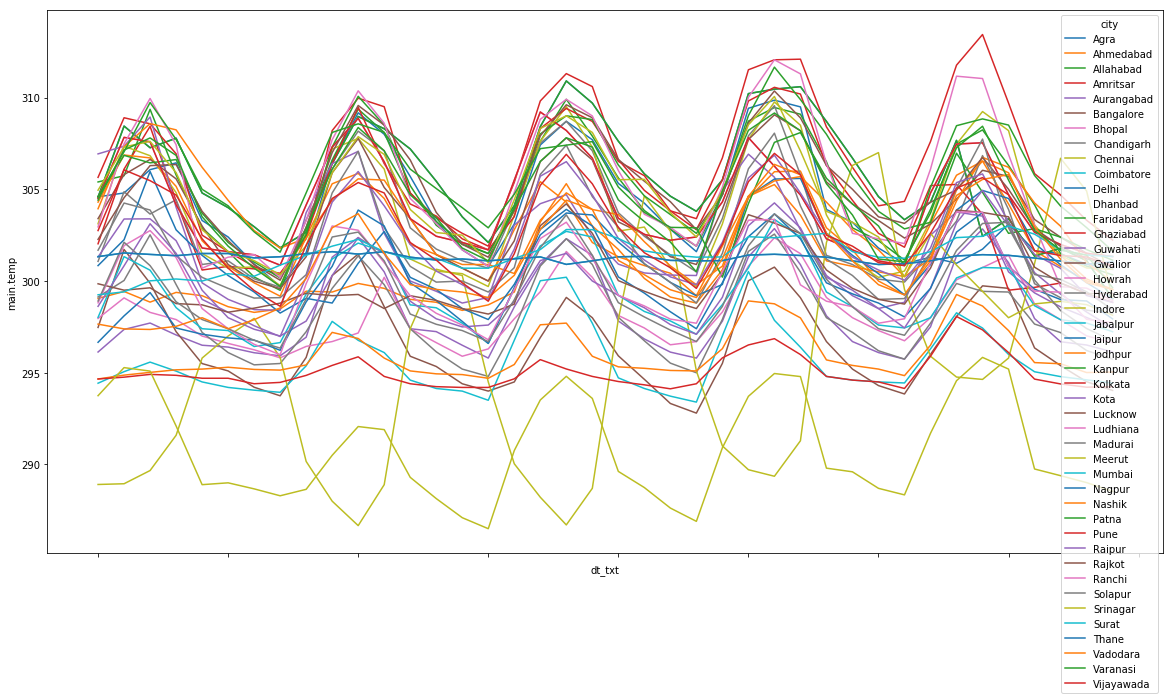

In [27]:
#plotting average temperature at every 3 hrs duriation across all cities
fig, ax = plt.subplots(figsize=(20,10))
forecast_plot.groupby(['dt_txt','city']).mean()['main.temp'].unstack().plot(ax=ax)
ax.set_xlabel('dt_txt')
ax.set_ylabel('main.temp')